### Data set <br>
https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## 1. Loading Dataset

In [2]:
df = pd.read_excel("C:/Users/keerthi/Downloads/archive (5)/E Commerce Dataset.xlsx", sheet_name=1)

## 2. Data Checking and cleaning

In [3]:
df.shape

(5630, 20)

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
# Percentage of Missing Values
round(df.isnull().sum()/df.shape[0] * 100, 2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [7]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [8]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### categorical
PreferredLoginDevice(Mobile Phone,Computer)<br>
PreferredPaymentMode(Debit Card,Credit Card,E wallet,UPI,Cash on Delivery)<br>
Gender(Male,Female)<br>
PreferedOrderCat(Laptop & Accessory,Fashion,Mobile,Grocery,Others)<br>
MaritalStatus(Married,Single,Divorced)<br>

### Discreate numerical
Churn(0/1)<br>
CityTier(1,2,3)<br>
WarehouseToHome(5-127) 34 uniqueue values<br>
Tenure(0-61)<br>
HourSpendOnApp(0-5)<br>
NumberOfDeviceRegistered(1-6)<br>
SatisfactionScore(0-5)<br>
NumberOfAddress (0-22)<br> 
complain(0/1)<br>
OrderAmountHikeFromlastYear(11-26)<br>
CouponUsed(0-16)<br>
OrderCount(1-16)<br>
DaySinceLastOrder(0-46)<br>

### Numerical
CashbackAmount   

### column of not much use
CustomerID

In [9]:
df = df.drop(columns = ["CustomerID"])

## 3. Data preparation

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Displays the number and sum of categories of each categorical column
for col in categorical_columns:
    print(f'Value counts for {col}:\n')
    print(df[col].value_counts())
    print('-' * 50 )
    print('\n')

Value counts for PreferredLoginDevice:

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
--------------------------------------------------


Value counts for PreferredPaymentMode:

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
--------------------------------------------------


Value counts for Gender:

Male      3384
Female    2246
Name: Gender, dtype: int64
--------------------------------------------------


Value counts for PreferedOrderCat:

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
--------------------------------------------------


Value counts for MaritalStatus:

Married     2986
Single      1796
Div

#### Points Noticed <br> 
Mobile Phone and Phone are same <br>
Credit Card and CC are same <br>
Cash on Delivary and Cod are same <br>
Mobile Phone and Mobile are same <br>
So, renaming  those classes with one name

In [11]:
# Replacing duplicate values
df["PreferredLoginDevice"].replace("Phone", "Mobile Phone", inplace = True)
df["PreferredPaymentMode"].replace(["CC", "COD"], ["Credit Card", "Cash on Delivery"], inplace = True)
df["PreferedOrderCat"].replace("Mobile Phone", "Mobile", inplace = True)

In [12]:
for col in ["PreferredLoginDevice", "PreferredPaymentMode", "PreferedOrderCat"]:
    print(f"categories of {col}: {df[col].unique()}\n")

categories of PreferredLoginDevice: ['Mobile Phone' 'Computer']

categories of PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']

categories of PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']



In [13]:
# join the values of the categorical columns by removing space 
# for cleaning
for i in categorical_columns:
    df[i] = df[i].apply(lambda x: x.replace(" ", ""))

### Missing Value imputation using Mode

In [14]:
# Tenure                         4.69
# WarehouseToHome                4.46
# HourSpendOnApp                 4.53
# OrderAmountHikeFromlastYear    4.71
# CouponUsed                     4.55
# OrderCount                     4.58
# DaySinceLastOrder              5.45
for col in ["Tenure", "WarehouseToHome", "HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","DaySinceLastOrder","OrderCount"]:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [15]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,MobilePhone,3,6.0,DebitCard,Female,3.0,3,Laptop&Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,1.0,MobilePhone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,1.0,MobilePhone,1,30.0,DebitCard,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,MobilePhone,3,15.0,DebitCard,Male,2.0,4,Laptop&Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,MobilePhone,1,12.0,CreditCard,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [16]:
# Percentage of Missing Values
round(df.isnull().sum()/df.shape[0] * 100, 2)

Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

## 4. EDA

#### Univarient Analysis

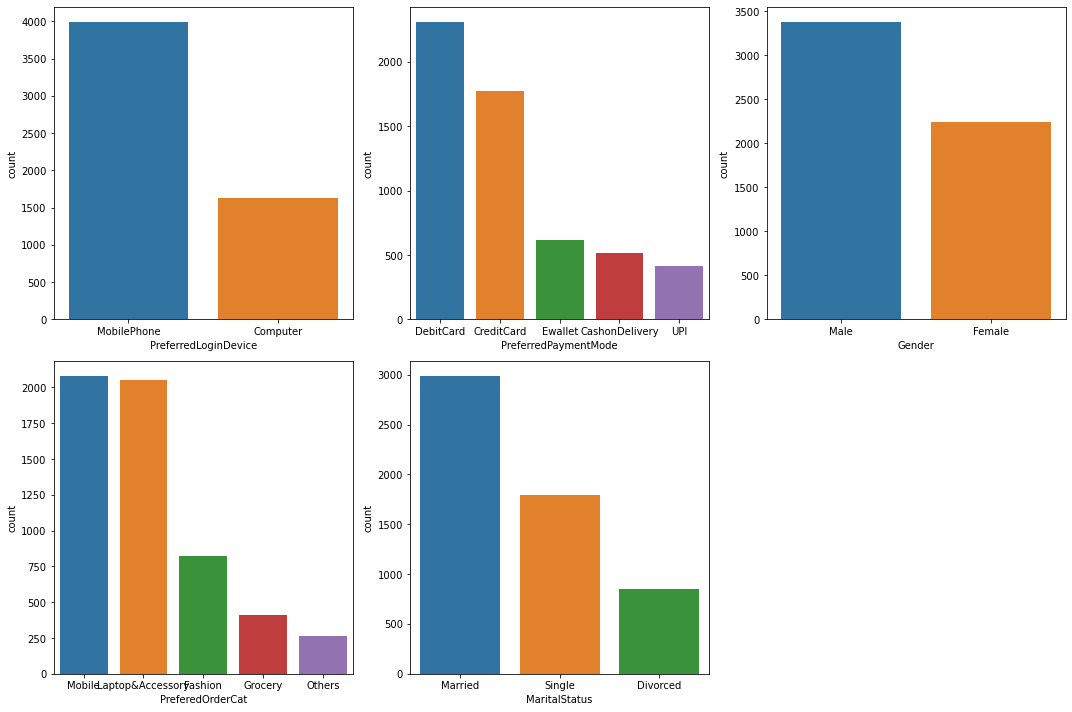

In [17]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up the figure and subplots (adjust number of rows and columns)
n_cols = 3  # Set the number of columns in the row
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array if there's more than one row
axes = axes.flatten()

# Loop through categorical columns and create the countplots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    
# Hide any unused subplots if there are fewer than 3 columns in the last row
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Device used mobile Phone <br>
Married class is more compared to other classes <br>
debit card and Credit cards are frquent mode of paymets<br>
Mobile, Laptop&Accessories are preferred category<br>

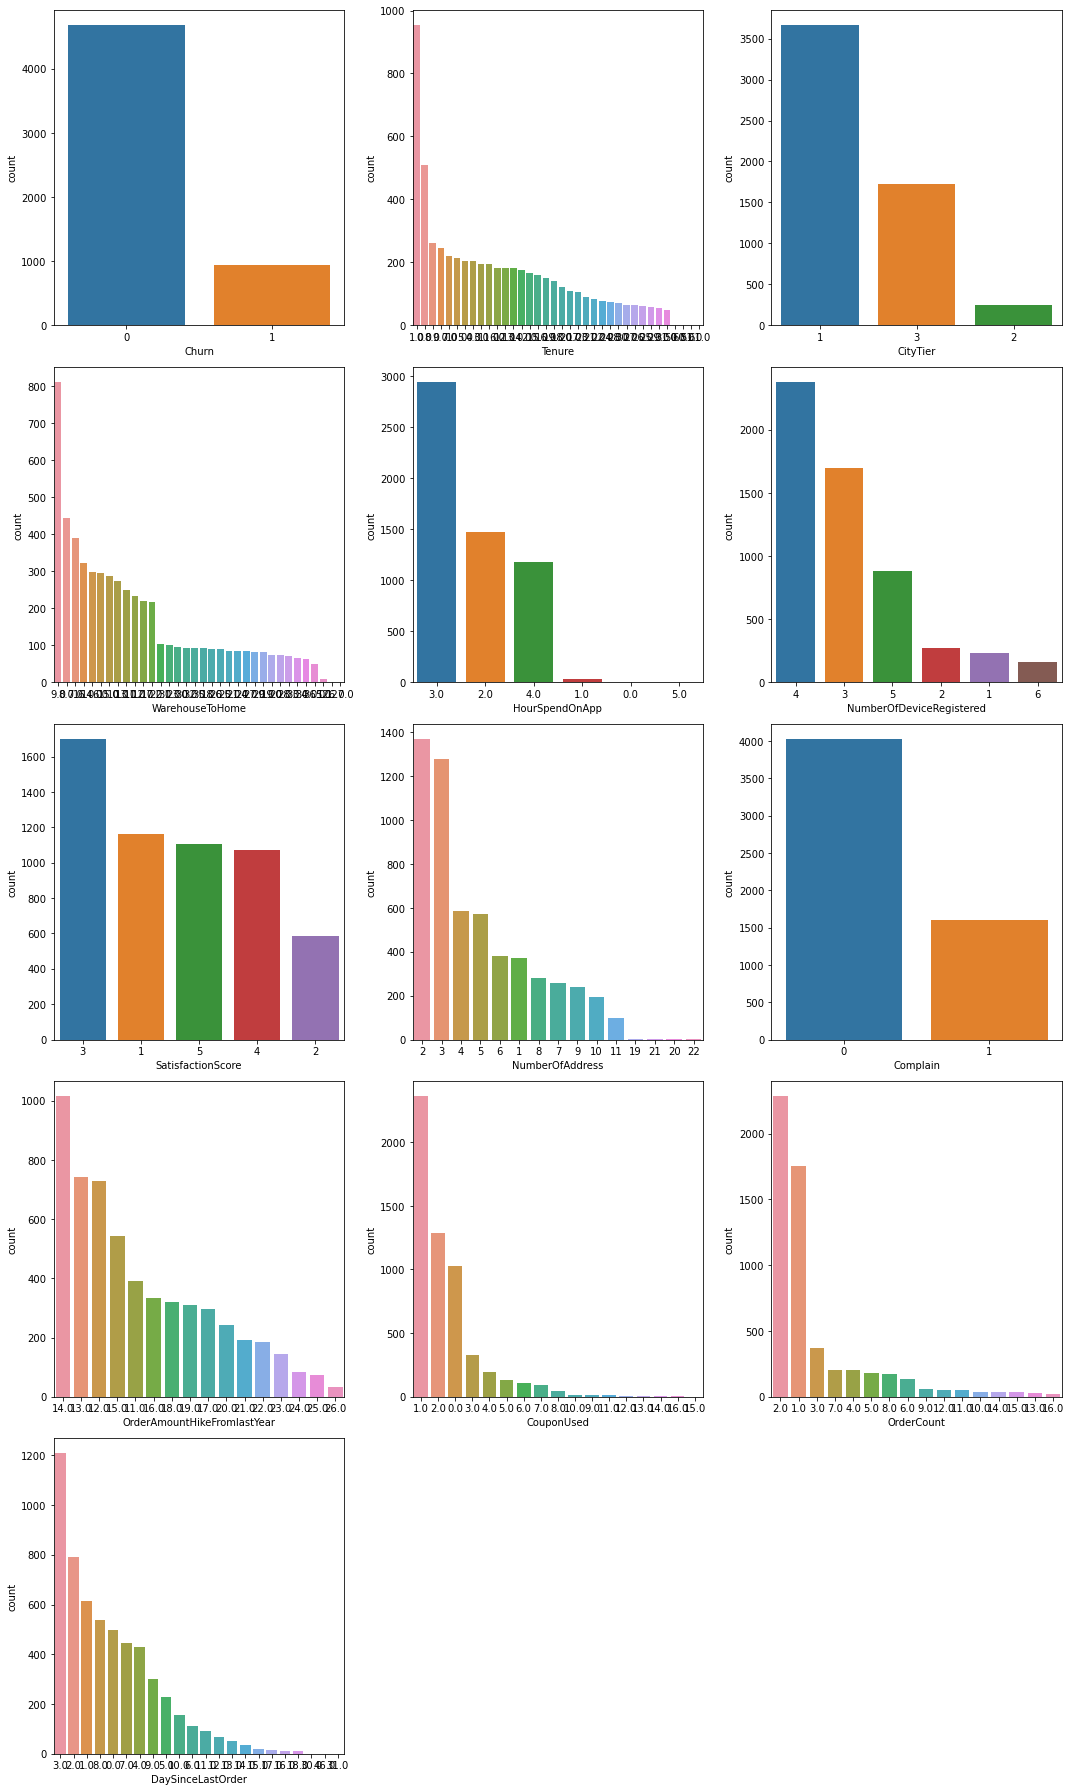

In [18]:
# Select Discreate Numerical columns
dis_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('CashbackAmount')


# Set up the figure and subplots (adjust number of rows and columns)
n_cols = 3  # Set the number of columns in the row
n_rows = (len(dis_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array if there's more than one row
axes = axes.flatten()

# Loop through categorical columns and create the countplots
for i, col in enumerate(dis_columns):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    
# Hide any unused subplots if there are fewer than 3 columns in the last row
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

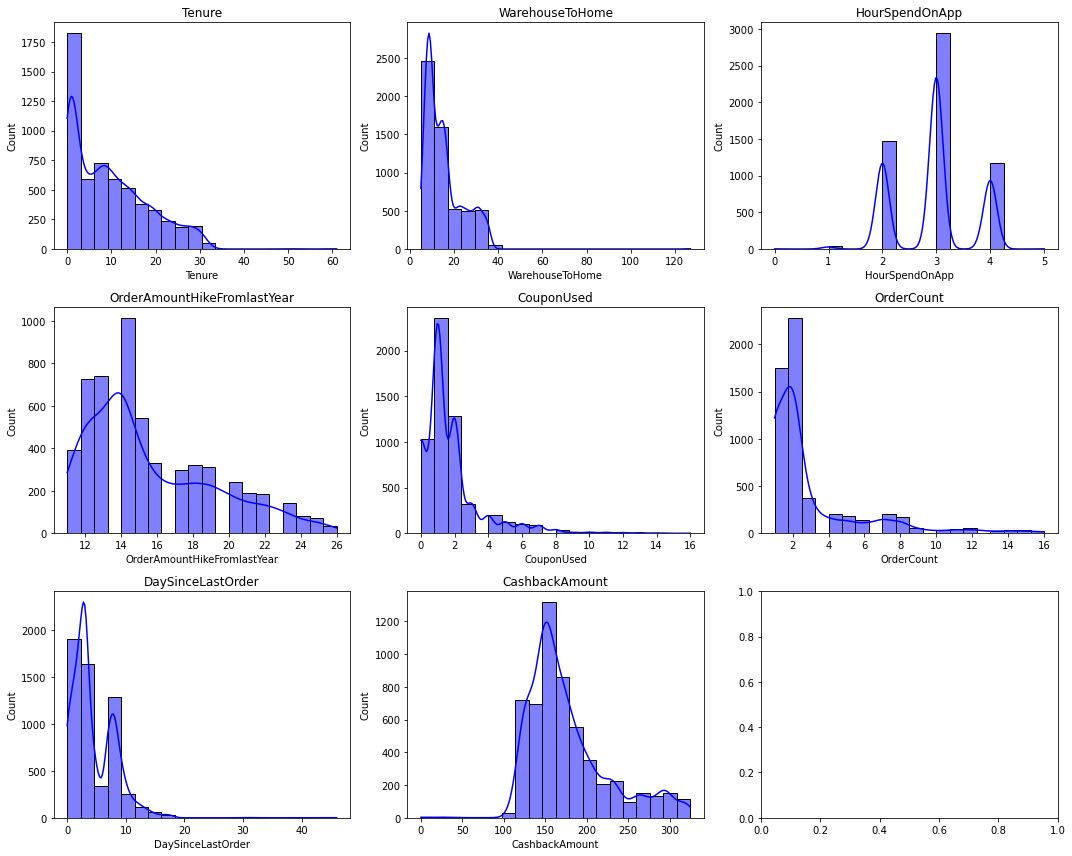

In [19]:
# Select numerical columns excluding 'id'
num_cols = df.select_dtypes(include=["float64"]).columns 


# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  

# Plot histograms
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(col)

# Show the plot
plt.tight_layout()
plt.show()


### Bivarient analysis

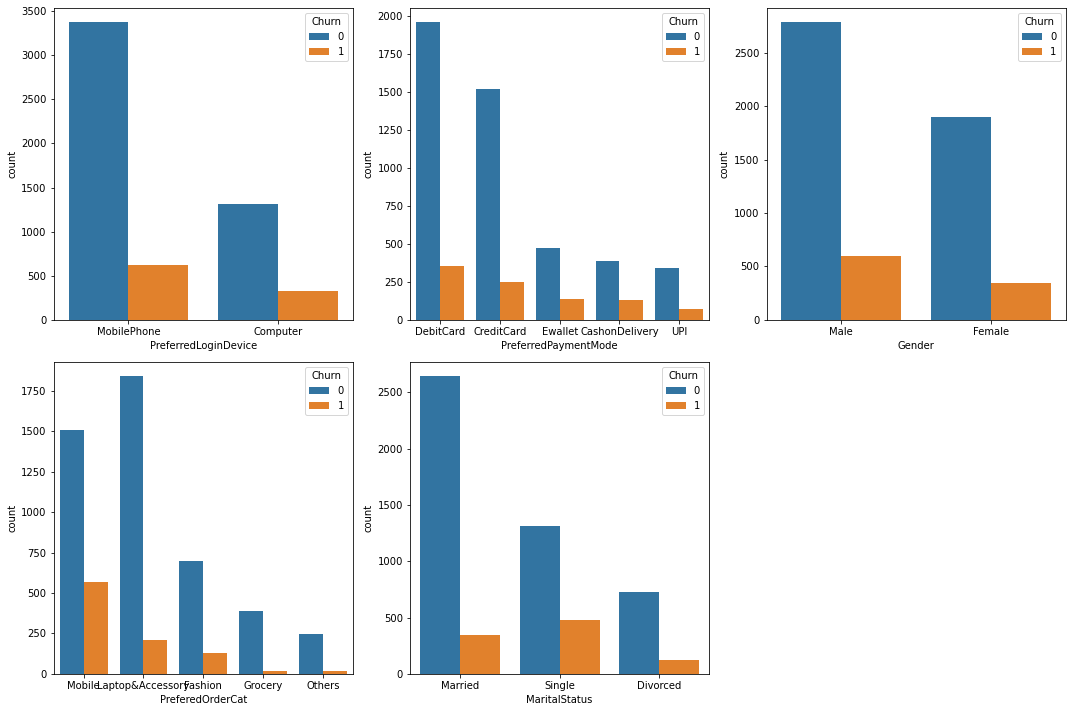

In [20]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up the figure and subplots (adjust number of rows and columns)
n_cols = 3  # Set the number of columns in the row
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array if there's more than one row
axes = axes.flatten()

# Loop through categorical columns and create the countplots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue="Churn", order=df[col].value_counts().index)
    
# Hide any unused subplots if there are fewer than 3 columns in the last row
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### analysis
Preferred Login Device :Mobile Phones has less churn overall class <br> 
Marital Status: churn is more positively correlated for Single class<br>
PreferedOrderCat: churn is negligible for Grocery and other, on Delivery<br>
Mobile phone churn is more than all other classes<br>

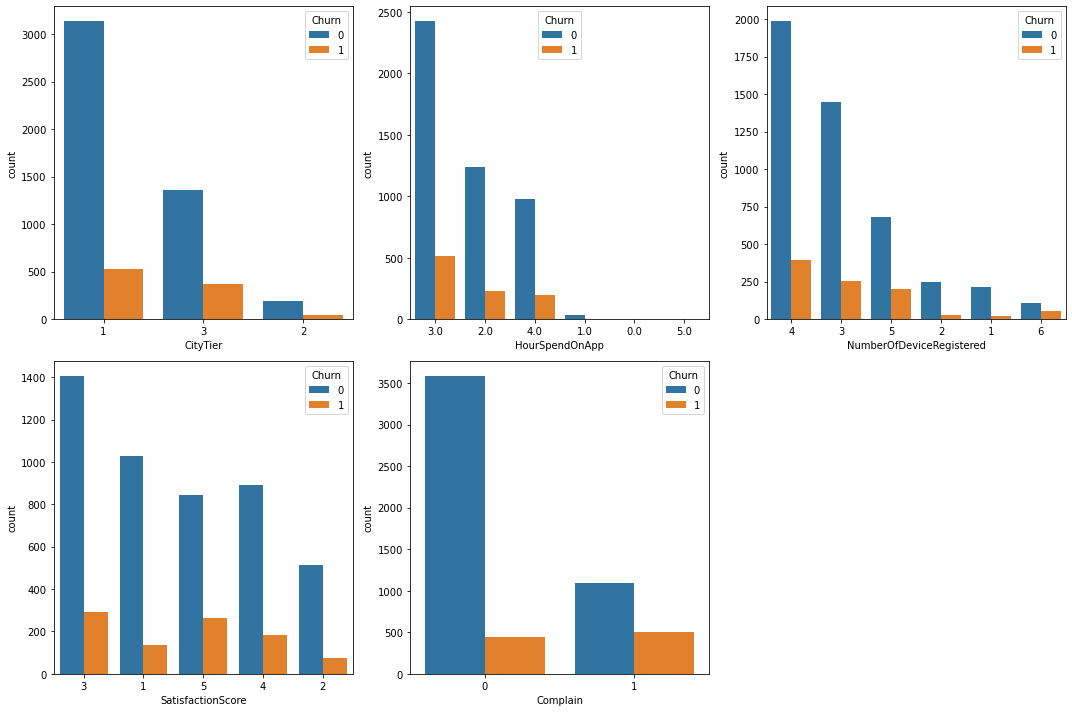

In [21]:
# Select Discreate Numerical columns
dis_cols = ['CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','Complain']

# Set up the figure and subplots (adjust number of rows and columns)
n_cols = 3  # Set the number of columns in the row
n_rows = (len(dis_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array if there's more than one row
axes = axes.flatten()

# Loop through categorical columns and create the countplots
for i, col in enumerate(dis_cols):
    sns.countplot(data=df, x=col, ax=axes[i],hue="Churn", order=df[col].value_counts().index)
    
# Hide any unused subplots if there are fewer than 3 columns in the last row
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### analysis
Complain =1 has more correlated to churn. Among the total class(1/3) class is churn=1 <br>
NoOfDevices registered =6 has less class as overall but has more churn.<br>
statisfactionscore =1 has less churn and 5 has more churn



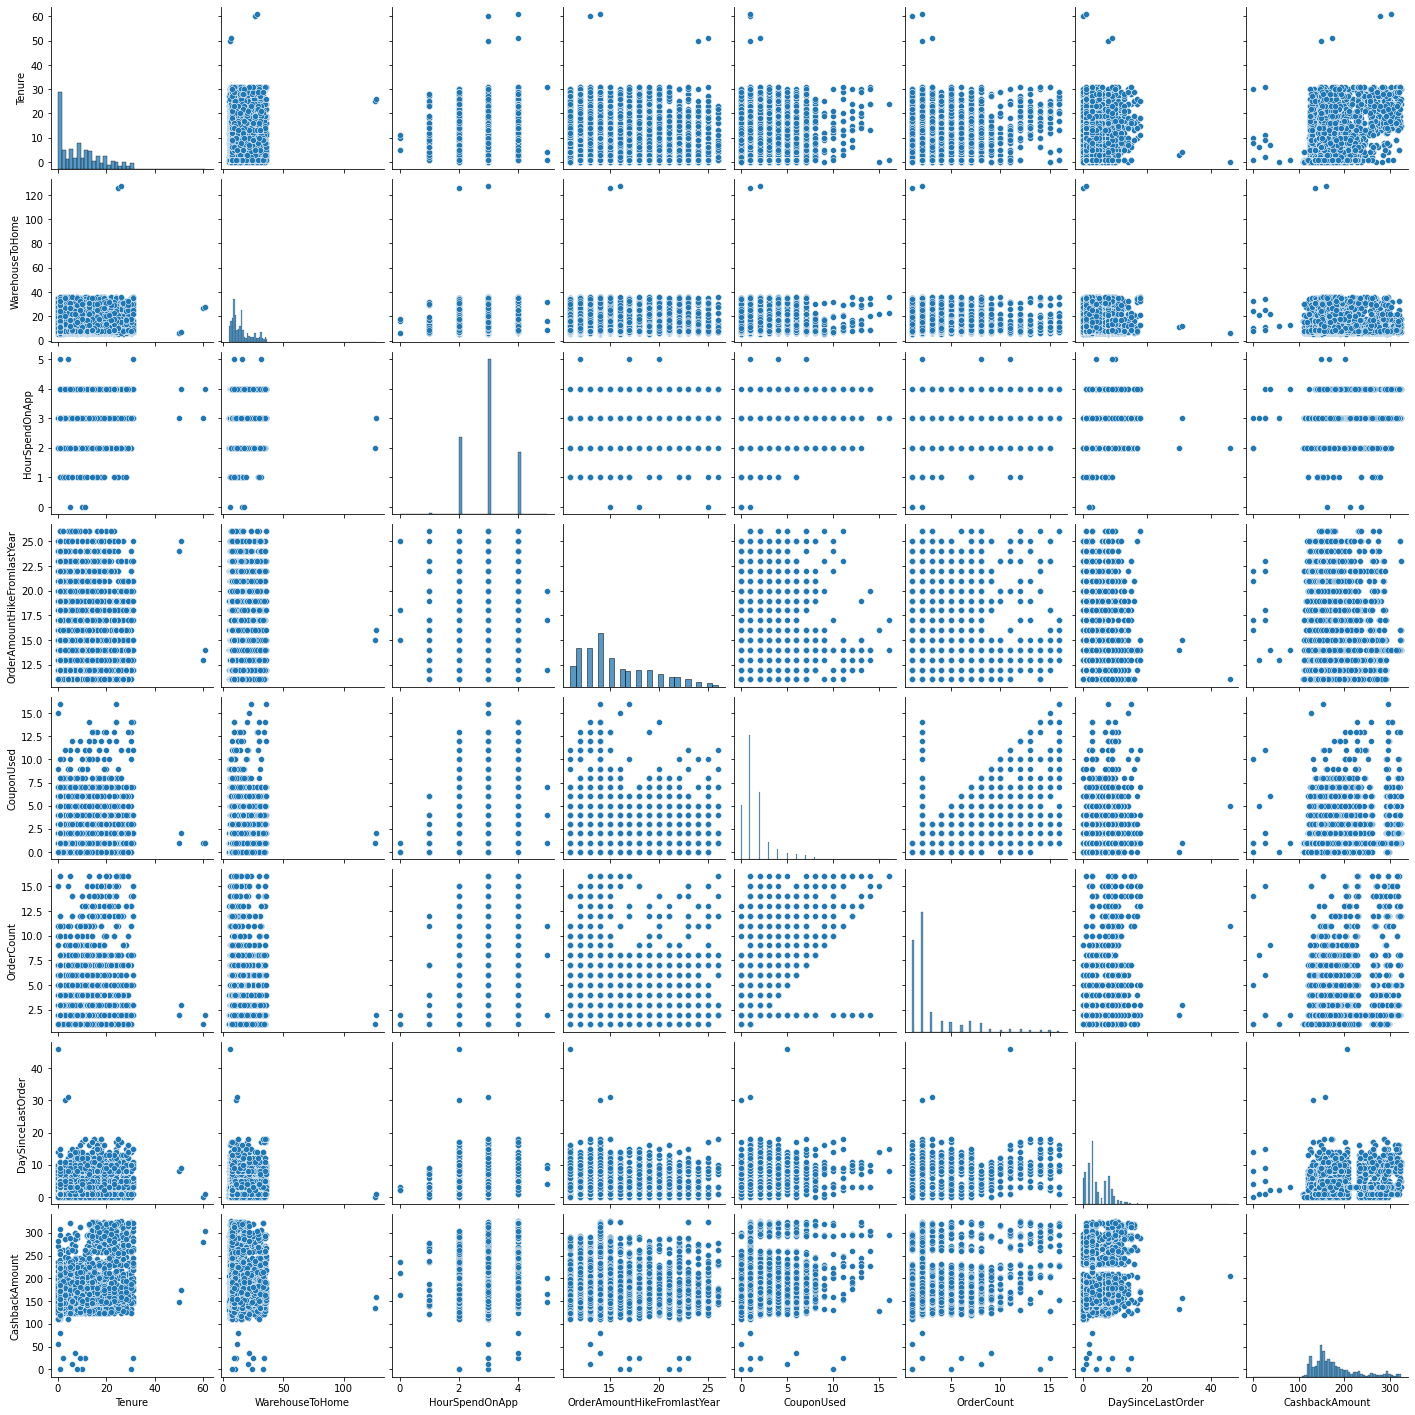

In [22]:
# Numerical
# Create the pairplot for selected numerical columns
sns.pairplot(df[num_cols])

# Show the plot
plt.show()

### Multi varient Analysis

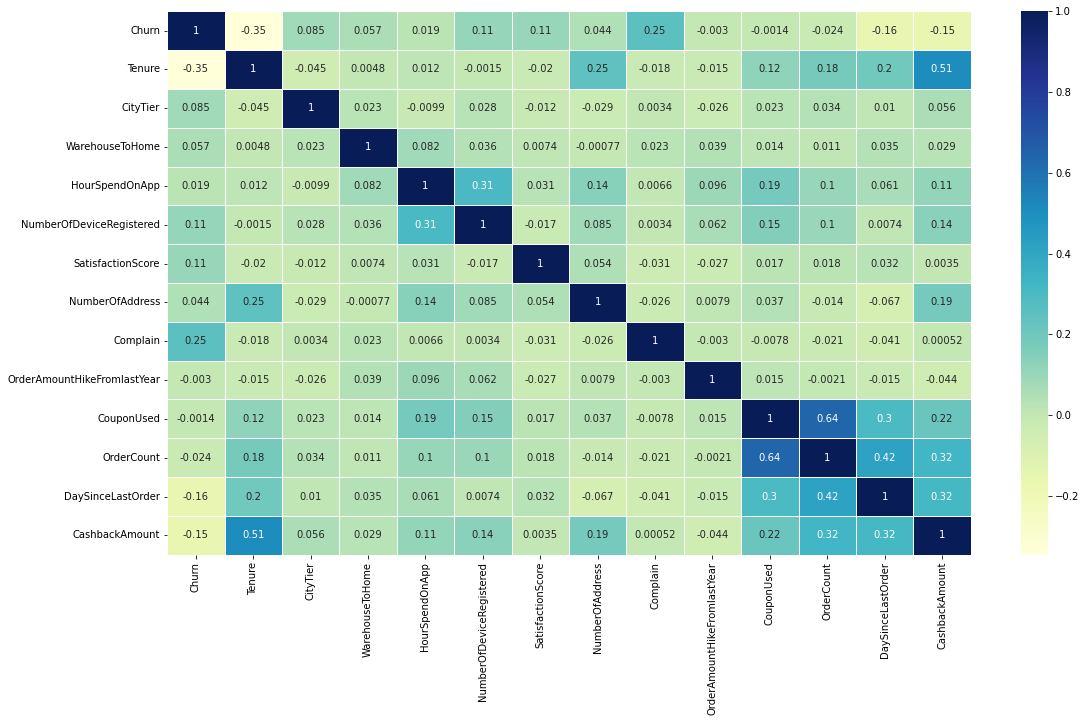

In [23]:

# heat Map
plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

# plotting
plt.show()

## 5.One hot encoding for Categorical columns
<br> PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus

In [24]:

# Encoding before imputing missing values
df = pd.get_dummies(df, drop_first = True)

#viewing the columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Churn                              5630 non-null   int64  
 1   Tenure                             5630 non-null   float64
 2   CityTier                           5630 non-null   int64  
 3   WarehouseToHome                    5630 non-null   float64
 4   HourSpendOnApp                     5630 non-null   float64
 5   NumberOfDeviceRegistered           5630 non-null   int64  
 6   SatisfactionScore                  5630 non-null   int64  
 7   NumberOfAddress                    5630 non-null   int64  
 8   Complain                           5630 non-null   int64  
 9   OrderAmountHikeFromlastYear        5630 non-null   float64
 10  CouponUsed                         5630 non-null   float64
 11  OrderCount                         5630 non-null   float

## 6. Class imbalance 

In [25]:
# dividing Target and independent variables

X = df.drop('Churn', axis = 1)
y = df["Churn"]


In [26]:
from collections import Counter

counter = Counter(y)
majority_class = max(counter.values())
minority_class = min(counter.values())
imbalance_ratio = majority_class / minority_class
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 4.94


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


## 7. Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)


In [29]:
from collections import Counter

counter = Counter(y_resampled)
majority_class = max(counter.values())
minority_class = min(counter.values())
imbalance_ratio = majority_class / minority_class
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 1.00


In [30]:

# checking for class imbalance post train test split
print(y_train.value_counts())
print(y_test.value_counts())

1    3746
0    3745
Name: Churn, dtype: int64
0    937
1    936
Name: Churn, dtype: int64


## 6. Models Building

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic regression
lr= LogisticRegression(random_state = 42)

#Fitting the Model
lr.fit(X_train, y_train)

# Predict using the trained model
y_train_pred = lr.predict(X_train)  # Predictions for Train Data
y_test_pred = lr.predict(X_test)  # Predictions for Test Data


# ---- Train Data Evaluation ----
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
cr_train = classification_report(y_train, y_train_pred)

print("Confusion Matrix: Training Data\n", cm_train)
print("\n Accuracy:", accuracy_train)
print("\n Classification Report:\n", cr_train)


print("-" * 75)

# ---- Test Data Evaluation ----
cm_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
cr_test = classification_report(y_test, y_test_pred)

print(" Confusion Matrix: Testing Data\n", cm_test)
print("\n Accuracy:", accuracy_test)
print("\n Classification Report:\n", cr_test)



Confusion Matrix: Training Data
 [[3087  658]
 [ 588 3158]]

 Accuracy: 0.8336670671472434

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      3745
           1       0.83      0.84      0.84      3746

    accuracy                           0.83      7491
   macro avg       0.83      0.83      0.83      7491
weighted avg       0.83      0.83      0.83      7491

---------------------------------------------------------------------------
 Confusion Matrix: Testing Data
 [[771 166]
 [142 794]]

 Accuracy: 0.8355579284570208

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       937
           1       0.83      0.85      0.84       936

    accuracy                           0.84      1873
   macro avg       0.84      0.84      0.84      1873
weighted avg       0.84      0.84      0.84      1873



#### FN are more important. Recall should be considered as the best metric

### ROC Curve

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def Roc(y_test, y_pred_prob) :
    # Assuming y_true (actual churn labels) and y_pred_prob (predicted probabilities)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Churn Prediction')
    plt.legend(loc='lower right')
    plt.show()


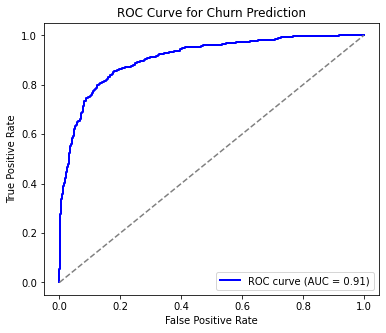

In [33]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
Roc(y_test, y_pred_prob)

#### AUC =0.91  and Recall 0.82 is a good Model. 

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Logistic regression
dt = DecisionTreeClassifier(random_state = 42)

#Fitting the Model
dt.fit(X_train, y_train)

# Predict using the trained model
y_train_pred = dt.predict(X_train)  # Predictions for Train Data
y_test_pred = dt.predict(X_test)  # Predictions for Test Data


# ---- Train Data Evaluation ----
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
cr_train = classification_report(y_train, y_train_pred)

print("Confusion Matrix: Training Data\n", cm_train)
print("\n Accuracy:", accuracy_train)
print("\n Classification Report:\n", cr_train)


print("-" * 75)

# ---- Test Data Evaluation ----
cm_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
cr_test = classification_report(y_test, y_test_pred)

print(" Confusion Matrix: Testing Data\n", cm_test)
print("\n Accuracy:", accuracy_test)
print("\n Classification Report:\n", cr_test)




Confusion Matrix: Training Data
 [[3745    0]
 [   0 3746]]

 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3745
           1       1.00      1.00      1.00      3746

    accuracy                           1.00      7491
   macro avg       1.00      1.00      1.00      7491
weighted avg       1.00      1.00      1.00      7491

---------------------------------------------------------------------------
 Confusion Matrix: Testing Data
 [[881  56]
 [ 53 883]]

 Accuracy: 0.9418045915643353

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       937
           1       0.94      0.94      0.94       936

    accuracy                           0.94      1873
   macro avg       0.94      0.94      0.94      1873
weighted avg       0.94      0.94      0.94      1873



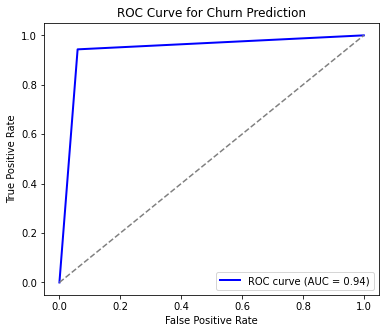

In [35]:
# ROC 
y_pred_prob = dt.predict_proba(X_test)[:, 1]
Roc(y_test, y_pred_prob)


#### We can explain that this is not overfitting as the test data aswell performs very well. AUC 0.94 and recall 0.94 is a Good model

###  Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

# Logistic regression
gb = GradientBoostingClassifier(random_state = 42)

# Fitting the Model
gb.fit(X_train, y_train)

# Predict using the trained model
y_train_pred = gb.predict(X_train)  # Predictions for Train Data
y_test_pred = gb.predict(X_test)  # Predictions for Test Data


# ---- Train Data Evaluation ----
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
cr_train = classification_report(y_train, y_train_pred)

print("Confusion Matrix: Training Data\n", cm_train)
print("\n Accuracy:", accuracy_train)
print("\n Classification Report:\n", cr_train)


print("-" * 75)

# ---- Test Data Evaluation ----
cm_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
cr_test = classification_report(y_test, y_test_pred)

print(" Confusion Matrix: Testing Data\n", cm_test)
print("\n Accuracy:", accuracy_test)
print("\n Classification Report:\n", cr_test)


Confusion Matrix: Training Data
 [[3493  252]
 [ 268 3478]]

 Accuracy: 0.9305833667067147

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3745
           1       0.93      0.93      0.93      3746

    accuracy                           0.93      7491
   macro avg       0.93      0.93      0.93      7491
weighted avg       0.93      0.93      0.93      7491

---------------------------------------------------------------------------
 Confusion Matrix: Testing Data
 [[872  65]
 [ 67 869]]

 Accuracy: 0.9295248264815803

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       937
           1       0.93      0.93      0.93       936

    accuracy                           0.93      1873
   macro avg       0.93      0.93      0.93      1873
weighted avg       0.93      0.93      0.93      1873



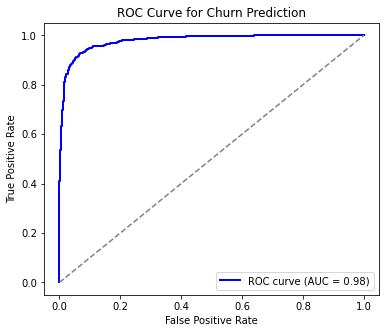

In [37]:

## ROC
y_pred_prob =gb.predict_proba(X_test)[:, 1]
Roc(y_test, y_pred_prob)

#### AUC = 0.98

### Insights 
#### Among all the models Gradient boost is performing the best with auc=0.98 recall =0.93